view the full project at: 
https://www.kaggle.com/code/natecekay/clothing-accessories-trends

#Introduction

Clothing & Accessories Trends Analysis  

In this exploratory data analysis, I examined customer trends in clothing and accessories sales across the United States. The project visualizes various customer trends and patterns. This exploratory analysis was conducted with Python. 

by Nathaniel Cekay

Column Name -                 Description
Customer ID -                   Unique Identifier for each customer
Age -                       Age of customer
Gender -                    Gender of customer (M/F) 
Item Purchased -            Name of item purchased
Category -                  Type of item purchsed
Purchase Amount (USD) -     Purchase amount (in USD)  
Location -                   Location of purchase (State)
Size -                      Size of purchased item 
Color -                     Color of purchased item
Season -                    Season item was purchased 
Review Rating -             Review Rating for Item
Subscription Status -       Was customer a subscriber
Payment Method -            Payment method used 
Shipping Type -             Shipping Type
Discount Applied -          Was a discount applied 
Promo Code Used -           Was a promo code used
Previous Purchases -                     Number of previous purchases for that customer  
Preferred Payment Method -  Preferred payment method for that customer 
Frequency of Purchases -    How often customer makes the purchases

#Data-Loading

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.ensemble import IsolationForest
from scipy.stats import f_oneway
from wordcloud import WordCloud
import networkx as nx
%matplotlib inline

In [2]:
shopping_trends = pd.read_csv('/kaggle/input/customer-shopping-trends-dataset/shopping_trends.csv')

In [3]:
shopping_trends.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually


In [4]:
shopping_trends.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer ID               3900 non-null   int64  
 1   Age                       3900 non-null   int64  
 2   Gender                    3900 non-null   object 
 3   Item Purchased            3900 non-null   object 
 4   Category                  3900 non-null   object 
 5   Purchase Amount (USD)     3900 non-null   int64  
 6   Location                  3900 non-null   object 
 7   Size                      3900 non-null   object 
 8   Color                     3900 non-null   object 
 9   Season                    3900 non-null   object 
 10  Review Rating             3900 non-null   float64
 11  Subscription Status       3900 non-null   object 
 12  Payment Method            3900 non-null   object 
 13  Shipping Type             3900 non-null   object 
 14  Discount

##Data-Cleansing

<span style="color:blue; font-size:30px;">I begin by cleaning and formatting the dataset</span>
<div style="background-color:#f9f9f9; padding:10px; border-radius:5px;">
</div>

In [5]:
shopping_trends.isna()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3896,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3897,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3898,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [6]:
shopping_trends.isna().sum()

Customer ID                 0
Age                         0
Gender                      0
Item Purchased              0
Category                    0
Purchase Amount (USD)       0
Location                    0
Size                        0
Color                       0
Season                      0
Review Rating               0
Subscription Status         0
Payment Method              0
Shipping Type               0
Discount Applied            0
Promo Code Used             0
Previous Purchases          0
Preferred Payment Method    0
Frequency of Purchases      0
dtype: int64

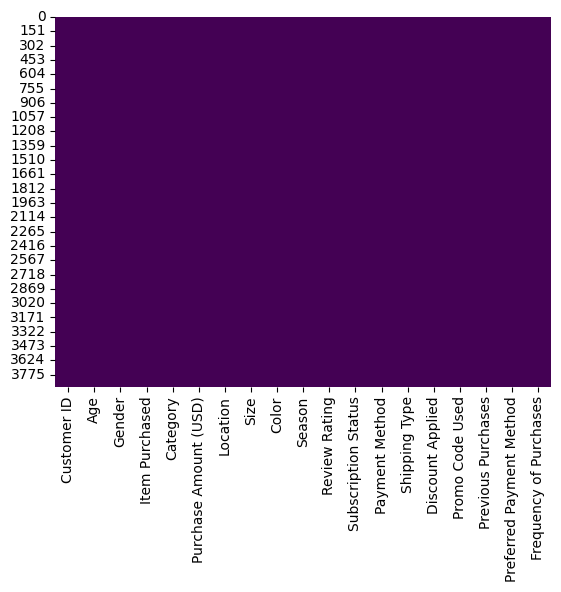

In [7]:
sns.heatmap(shopping_trends.isna(), cbar=False, cmap="viridis")
plt.show()

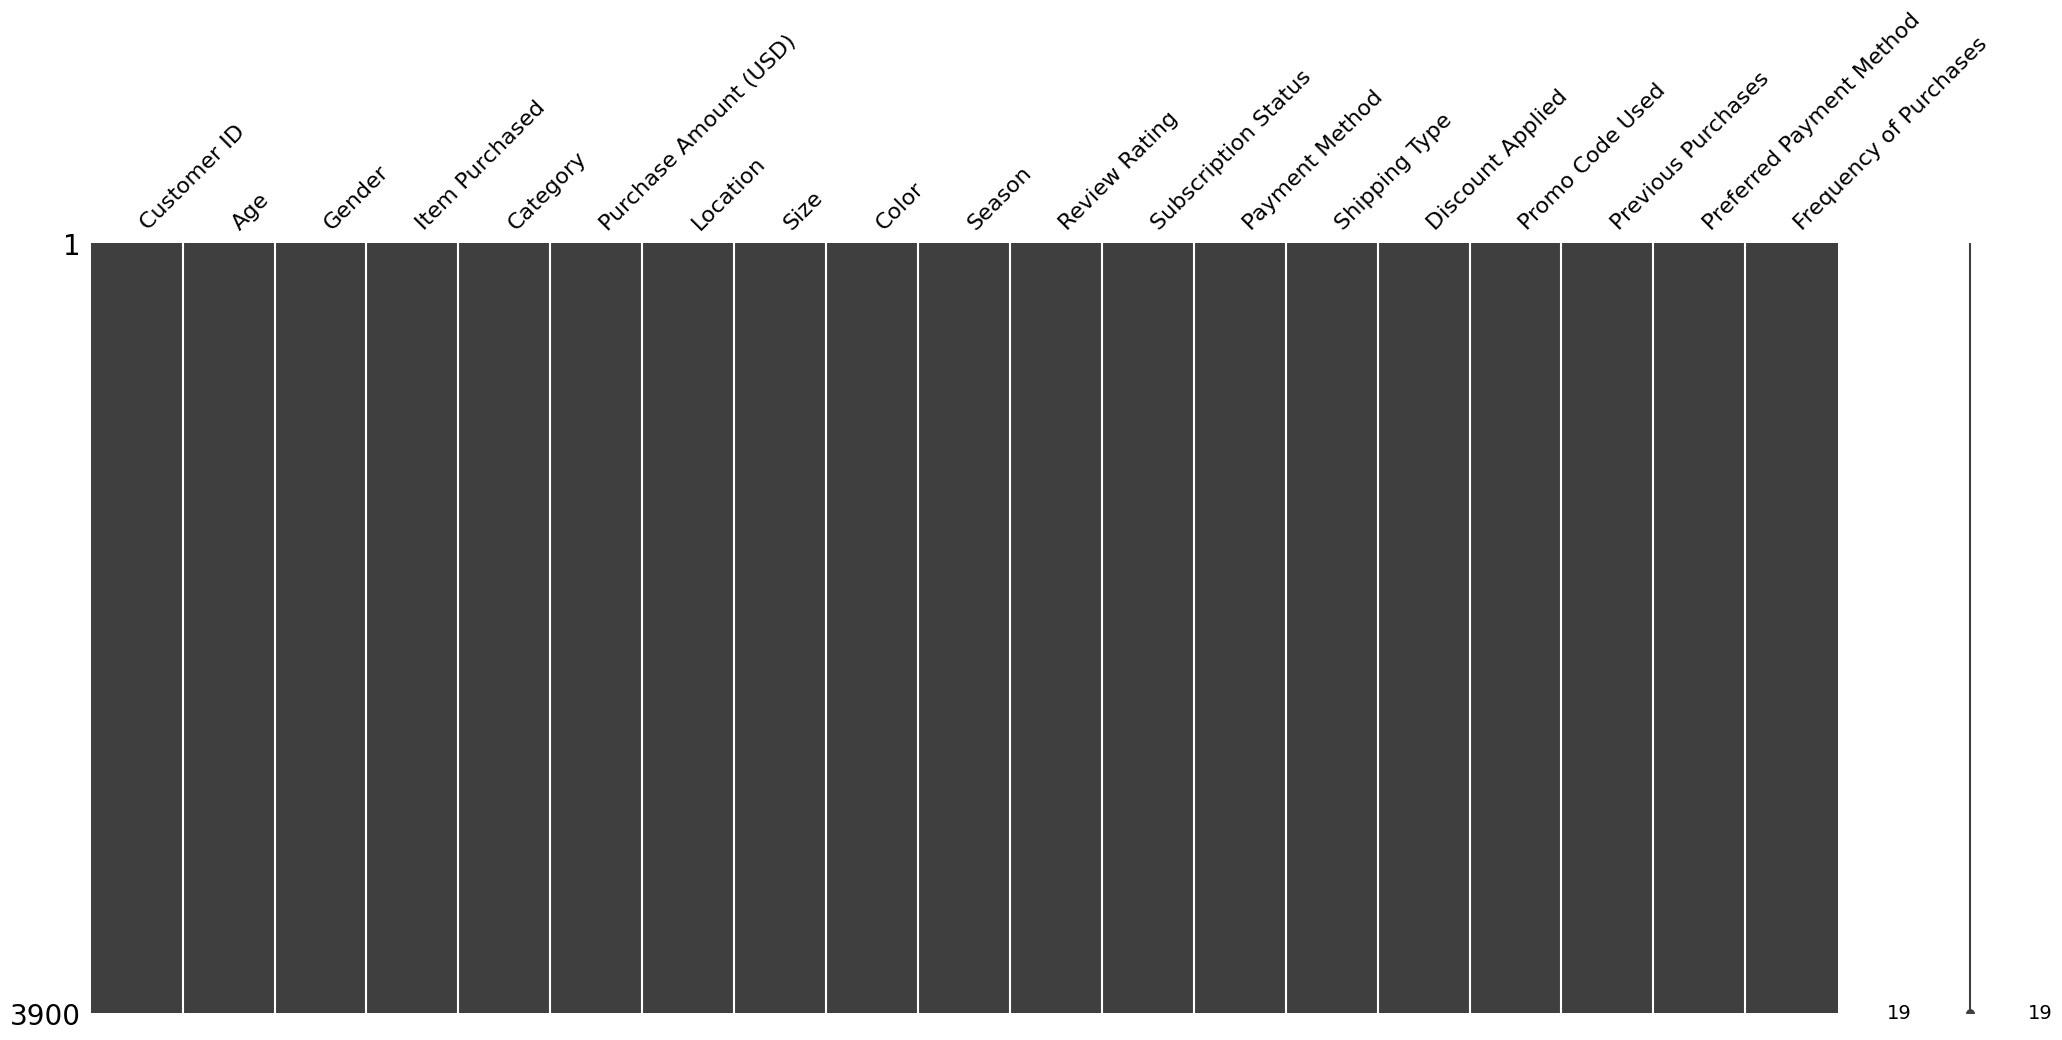

In [8]:
msno.matrix(shopping_trends)
plt.show()

<span style="color:blue; font-size:30px;">There are no missing or NAN values in the dataset</span>
<div style="background-color:#f9f9f9; padding:10px; border-radius:5px;">
</div>

<span style="color:blue; font-size:30px;">Checking for formatting and spelling errors</span>
<div style="background-color:#f9f9f9; padding:10px; border-radius:5px;">
</div>

In [9]:
categorical_columns = shopping_trends.select_dtypes(include=['object', 'category'])


for col in categorical_columns.columns:
    print(f"Unique values in column '{col}':")
    print(shopping_trends[col].unique())
    print("-" * 50)

Unique values in column 'Gender':
['Male' 'Female']
--------------------------------------------------
Unique values in column 'Item Purchased':
['Blouse' 'Sweater' 'Jeans' 'Sandals' 'Sneakers' 'Shirt' 'Shorts' 'Coat'
 'Handbag' 'Shoes' 'Dress' 'Skirt' 'Sunglasses' 'Pants' 'Jacket' 'Hoodie'
 'Jewelry' 'T-shirt' 'Scarf' 'Hat' 'Socks' 'Backpack' 'Belt' 'Boots'
 'Gloves']
--------------------------------------------------
Unique values in column 'Category':
['Clothing' 'Footwear' 'Outerwear' 'Accessories']
--------------------------------------------------
Unique values in column 'Location':
['Kentucky' 'Maine' 'Massachusetts' 'Rhode Island' 'Oregon' 'Wyoming'
 'Montana' 'Louisiana' 'West Virginia' 'Missouri' 'Arkansas' 'Hawaii'
 'Delaware' 'New Hampshire' 'New York' 'Alabama' 'Mississippi'
 'North Carolina' 'California' 'Oklahoma' 'Florida' 'Texas' 'Nevada'
 'Kansas' 'Colorado' 'North Dakota' 'Illinois' 'Indiana' 'Arizona'
 'Alaska' 'Tennessee' 'Ohio' 'New Jersey' 'Maryland' 'Vermont'
 '

<span style="color:blue; font-size:30px;">Removing Duplicate Columns</span>
<div style="background-color:#f9f9f9; padding:10px; border-radius:5px;">
</div>

In [10]:
def find_duplicate_columns(df):
    duplicates = []
    for col1 in df.columns:
        for col2 in df.columns:
            if col1 != col2 and df[col1].equals(df[col2]):
                duplicates.append((col1, col2))
    return duplicates

In [11]:
duplicate_columns = find_duplicate_columns(shopping_trends)
print("Duplicate columns:")
for dup in duplicate_columns:
    print(f"Column '{dup[0]}' is identical to column '{dup[1]}'")

Duplicate columns:
Column 'Discount Applied' is identical to column 'Promo Code Used'
Column 'Promo Code Used' is identical to column 'Discount Applied'


In [12]:
shopping_trends.drop(columns=['Discount Applied'], inplace=True)

<span style="color:blue; font-size:30px;">Checking for outliers</span>
<div style="background-color:#f9f9f9; padding:10px; border-radius:5px;">
</div>

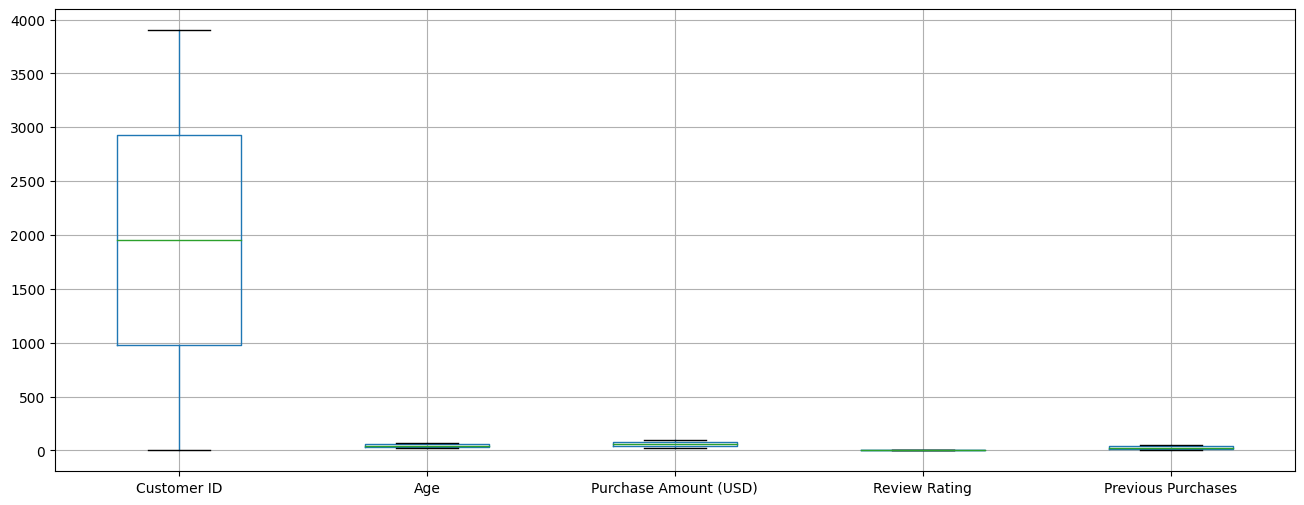

In [13]:
shopping_trends.boxplot(figsize=(16, 6))
plt.show()

In [14]:
numerical_columns = shopping_trends.select_dtypes(include=['int64', 'float64'])

In [15]:
iso = IsolationForest(contamination=0.05)  # Specify contamination as the expected proportion of outliers
outliers = iso.fit_predict(numerical_columns)

# -1 indicates outlier
numerical_columns['Outlier'] = outliers
print(numerical_columns[numerical_columns['Outlier'] == -1])

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


      Customer ID  Age  Purchase Amount (USD)  Review Rating  \
1               2   19                     64            3.1   
3               4   21                     90            3.5   
6               7   63                     85            3.2   
8               9   26                     97            2.6   
9              10   57                     31            4.8   
...           ...  ...                    ...            ...   
3864         3865   55                     99            4.9   
3868         3869   18                     29            3.3   
3876         3877   60                     85            2.6   
3877         3878   28                     96            4.2   
3884         3885   47                     29            4.9   

      Previous Purchases  Outlier  
1                      2       -1  
3                     49       -1  
6                     49       -1  
8                      8       -1  
9                      4       -1  
...            

<span style="color:blue; font-size:30px;">Though I found outliers, I will leave them in to examine the customer trends including greatest sales</span>
<div style="background-color:#f9f9f9; padding:10px; border-radius:5px;">
</div>

In [16]:
mapping = {'Yes': 0, 'No': 1}
shopping_trends['Promo Code Used'] = shopping_trends['Promo Code Used'].map(mapping)


In [17]:
mapping = {'Male': 0, 'Female': 1}
shopping_trends['Gender'] = shopping_trends['Gender'].map(mapping)

In [18]:
shopping_trends

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1,55,0,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,0,14,Venmo,Fortnightly
1,2,19,0,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,0,2,Cash,Fortnightly
2,3,50,0,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,0,23,Credit Card,Weekly
3,4,21,0,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,0,49,PayPal,Weekly
4,5,45,0,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,0,31,PayPal,Annually
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,3896,40,1,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,4.2,No,Cash,2-Day Shipping,1,32,Venmo,Weekly
3896,3897,52,1,Backpack,Accessories,49,Iowa,L,White,Spring,4.5,No,PayPal,Store Pickup,1,41,Bank Transfer,Bi-Weekly
3897,3898,46,1,Belt,Accessories,33,New Jersey,L,Green,Spring,2.9,No,Credit Card,Standard,1,24,Venmo,Quarterly
3898,3899,44,1,Shoes,Footwear,77,Minnesota,S,Brown,Summer,3.8,No,PayPal,Express,1,24,Venmo,Weekly


In [19]:
shopping_trends.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer ID               3900 non-null   int64  
 1   Age                       3900 non-null   int64  
 2   Gender                    3900 non-null   int64  
 3   Item Purchased            3900 non-null   object 
 4   Category                  3900 non-null   object 
 5   Purchase Amount (USD)     3900 non-null   int64  
 6   Location                  3900 non-null   object 
 7   Size                      3900 non-null   object 
 8   Color                     3900 non-null   object 
 9   Season                    3900 non-null   object 
 10  Review Rating             3900 non-null   float64
 11  Subscription Status       3900 non-null   object 
 12  Payment Method            3900 non-null   object 
 13  Shipping Type             3900 non-null   object 
 14  Promo Co

In [20]:
shopping_trends

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1,55,0,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,0,14,Venmo,Fortnightly
1,2,19,0,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,0,2,Cash,Fortnightly
2,3,50,0,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,0,23,Credit Card,Weekly
3,4,21,0,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,0,49,PayPal,Weekly
4,5,45,0,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,0,31,PayPal,Annually
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,3896,40,1,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,4.2,No,Cash,2-Day Shipping,1,32,Venmo,Weekly
3896,3897,52,1,Backpack,Accessories,49,Iowa,L,White,Spring,4.5,No,PayPal,Store Pickup,1,41,Bank Transfer,Bi-Weekly
3897,3898,46,1,Belt,Accessories,33,New Jersey,L,Green,Spring,2.9,No,Credit Card,Standard,1,24,Venmo,Quarterly
3898,3899,44,1,Shoes,Footwear,77,Minnesota,S,Brown,Summer,3.8,No,PayPal,Express,1,24,Venmo,Weekly


In [21]:
from scipy.stats import chi2_contingency

In [22]:
numerical_variables = shopping_trends.select_dtypes(include=['number'])


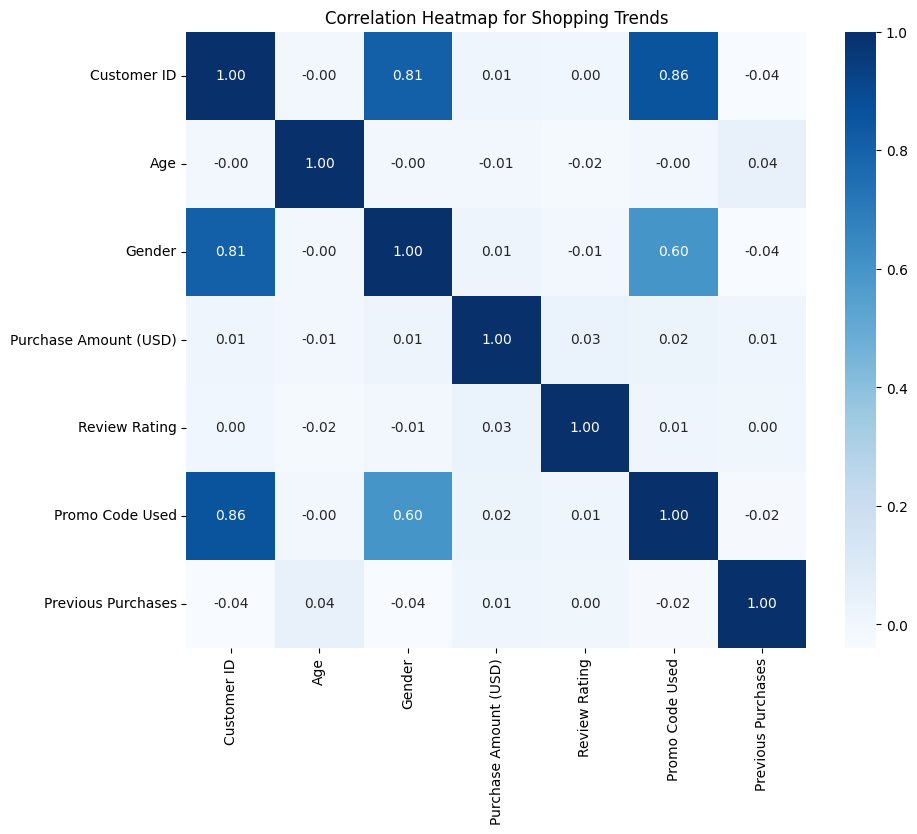

In [23]:
correlation_matrix = numerical_variables.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="Blues", cbar=True)
plt.title("Correlation Heatmap for Shopping Trends")
plt.show()

In [24]:
categorical_variables = shopping_trends.select_dtypes(include=['object', 'category'])

chi_square_results = []

for var1 in categorical_variables.columns:
    for var2 in categorical_variables.columns:
        if var1 != var2:
            contingency_table = pd.crosstab(categorical_variables[var1], categorical_variables[var2])
            if contingency_table.size > 0:  
                chi2, p, dof, expected = chi2_contingency(contingency_table)
                chi_square_results.append({
                    'Variable 1': var1,
                    'Variable 2': var2,
                    'Chi-Square Statistic': chi2,
                    'P-Value': p,
                    'Degrees of Freedom': dof
                })
chi_square_results_df = pd.DataFrame(chi_square_results)

chi_square_results_df

,Variable 1,Variable 2,Chi-Square Statistic,P-Value,Degrees of Freedom
0,Item Purchased,Category,11700.000000,0.000000,72
1,Item Purchased,Location,1139.889917,0.769911,1176
2,Item Purchased,Size,61.467919,0.807368,72
3,Item Purchased,Color,583.838683,0.401475,576
4,Item Purchased,Season,78.192049,0.288723,72
...,...,...,...,...,...
105,Frequency of Purchases,Season,10.697499,0.906750,18
106,Frequency of Purchases,Subscription Status,3.894656,0.690930,6
107,Frequency of Purchases,Payment Method,36.004835,0.207919,30
108,Frequency of Purchases,Shipping Type,31.251433,0.403123,30


In [25]:
sorted_chi_square_results_df = chi_square_results_df.sort_values(by='P-Value')

sorted_chi_square_results_df.head(20)

,Variable 1,Variable 2,Chi-Square Statistic,P-Value,Degrees of Freedom
0,Item Purchased,Category,11700.000000,0.000000,72
10,Category,Item Purchased,11700.000000,0.000000,72
70,Payment Method,Item Purchased,142.873900,0.075741,120
6,Item Purchased,Payment Method,142.873900,0.075741,120
95,Preferred Payment Method,Season,22.097834,0.105264,15
58,Season,Preferred Payment Method,22.097834,0.105264,15
38,Size,Preferred Payment Method,19.709288,0.183371,15
93,Preferred Payment Method,Size,19.709288,0.183371,15
107,Frequency of Purchases,Payment Method,36.004835,0.207919,30
79,Payment Method,Frequency of Purchases,36.004835,0.207919,30


In [26]:
numerical_variables = shopping_trends.select_dtypes(include=['number'])

categorical_variables = shopping_trends.select_dtypes(include=['object', 'category'])

anova_results = []

for num_var in numerical_variables.columns:
    for cat_var in categorical_variables.columns:
        groups = [numerical_variables[num_var][categorical_variables[cat_var] == category]
                  for category in categorical_variables[cat_var].unique()]
        
        try:
            f_stat, p_value = f_oneway(*groups)
            anova_results.append({
                'Numerical Variable': num_var,
                'Categorical Variable': cat_var,
                'F-Statistic': f_stat,
                'P-Value': p_value
            })
        except ValueError:
            continue

anova_results_df = pd.DataFrame(anova_results)

anova_results_df

,Numerical Variable,Categorical Variable,F-Statistic,P-Value
0,Customer ID,Item Purchased,1.439061,0.076461
1,Customer ID,Category,0.213278,0.887249
2,Customer ID,Location,1.017519,0.439715
3,Customer ID,Size,1.168540,0.320180
4,Customer ID,Color,0.751247,0.801106
...,...,...,...,...
72,Previous Purchases,Subscription Status,3.715623,0.053978
73,Previous Purchases,Payment Method,1.284374,0.267551
74,Previous Purchases,Shipping Type,1.476730,0.193911
75,Previous Purchases,Preferred Payment Method,0.560970,0.730030


In [27]:
sorted_anova_results_df = anova_results_df.sort_values(by='P-Value')

sorted_anova_results_df.head(20)

,Numerical Variable,Categorical Variable,F-Statistic,P-Value
61,Promo Code Used,Subscription Status,3749.388750,0.000000e+00
6,Customer ID,Subscription Status,5639.559018,0.000000e+00
28,Gender,Subscription Status,821.432195,4.219247e-164
38,Purchase Amount (USD),Season,3.746118,1.057616e-02
48,Review Rating,Color,1.776577,1.126284e-02
30,Gender,Shipping Type,2.452503,3.154363e-02
52,Review Rating,Shipping Type,2.352819,3.836537e-02
66,Previous Purchases,Item Purchased,1.550787,4.231105e-02
47,Review Rating,Size,2.716691,4.315460e-02
72,Previous Purchases,Subscription Status,3.715623,5.397810e-02


A highly significant relationship suggests that whether a promo code is used is strongly influenced by the subscription status. This could indicate that subscribers are much more likely to use promo codes. Gender has a statistically significant effect on subscription status. A significant but smaller effect suggests that the amount spent varies across seasons.Review ratings also varied with a slight significance based on the item's color. 

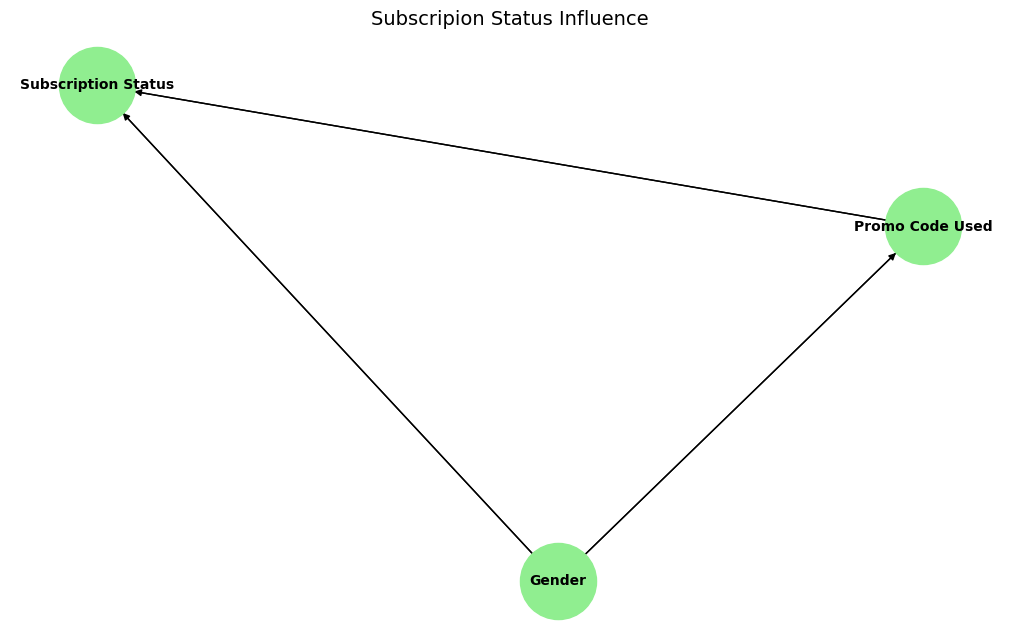

In [28]:
G = nx.DiGraph()
G.add_nodes_from(["Subscription Status", "Promo Code Used", "Gender"])
G.add_edges_from([
    ("Promo Code Used", "Subscription Status"),
    ("Gender", "Subscription Status"),
    ("Gender", "Promo Code Used")
])

plt.figure(figsize=(10, 6))
pos = nx.spring_layout(G, seed=42) 
nx.draw(G, pos, with_labels=True, node_size=3000, node_color="lightgreen", font_size=10, font_weight="bold", edge_color="black")
nx.draw_networkx_edges(G, pos, arrowstyle="->", arrowsize=20)
plt.title("Subscripion Status Influence", fontsize=14)
plt.show()


In [29]:
shopping_trends.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer ID               3900 non-null   int64  
 1   Age                       3900 non-null   int64  
 2   Gender                    3900 non-null   int64  
 3   Item Purchased            3900 non-null   object 
 4   Category                  3900 non-null   object 
 5   Purchase Amount (USD)     3900 non-null   int64  
 6   Location                  3900 non-null   object 
 7   Size                      3900 non-null   object 
 8   Color                     3900 non-null   object 
 9   Season                    3900 non-null   object 
 10  Review Rating             3900 non-null   float64
 11  Subscription Status       3900 non-null   object 
 12  Payment Method            3900 non-null   object 
 13  Shipping Type             3900 non-null   object 
 14  Promo Co

Goal: Identify groups of customers with similar behavior habits using k-means clustering

#Customer-Clustering-Analysis

In [30]:
data = shopping_trends

In [31]:
customer_summary = data.groupby('Customer ID').agg(
    Total_Purchase_Amount=('Purchase Amount (USD)', 'sum'),
    Total_Purchases=('Customer ID', 'count'),
    Average_Purchase_Amount=('Purchase Amount (USD)', 'mean'),
    Average_Review_Rating=('Review Rating', 'mean'),
    Total_Previous_Purchases=('Previous Purchases', 'sum')
).reset_index()


In [32]:
features = customer_summary[['Total_Purchase_Amount', 'Total_Purchases', 
                             'Average_Purchase_Amount', 'Average_Review_Rating', 
                             'Total_Previous_Purchases']]


In [33]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [34]:
inertia = []
K = range(1, 11)  
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:8

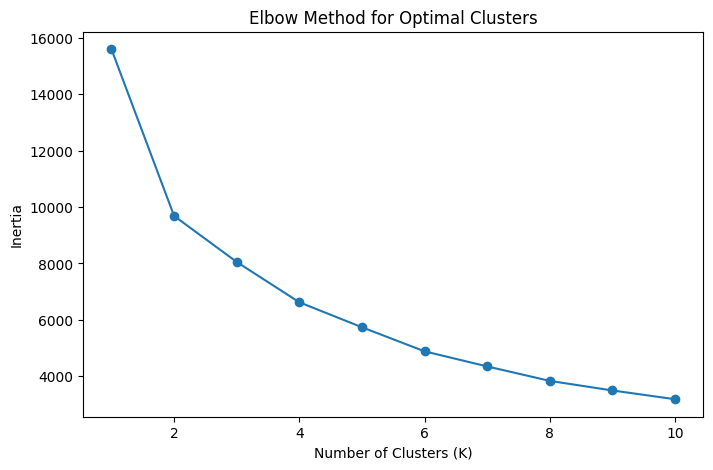

In [35]:
plt.figure(figsize=(8, 5))
plt.plot(K, inertia, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Clusters')
plt.show()

In [36]:
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
customer_summary['Cluster'] = kmeans.fit_predict(scaled_features)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [37]:
cluster_summary = customer_summary.groupby('Cluster').mean()
print(cluster_summary)

         Customer ID  Total_Purchase_Amount  Total_Purchases  \
Cluster                                                        
0        1943.004654              36.873182              1.0   
1        1965.637916              78.108715              1.0   
2        1946.788390              77.491573              1.0   

         Average_Purchase_Amount  Average_Review_Rating  \
Cluster                                                   
0                      36.873182               3.711344   
1                      78.108715               4.413297   
2                      77.491573               3.120787   

         Total_Previous_Purchases  
Cluster                            
0                       25.239674  
1                       26.678347  
2                       24.148876  


Cluster 0: Low spenders with moderate ratings.
Cluster 1: High spenders with excellent ratings.
Cluster 2: Moderate spenders with low ratings.


The company can use these clusters to send personalized emails or advertisements.
Cluster 0: “Get 10% off your next purchase – we value your loyalty!”
Cluster 1: “As one of our top customers, enjoy early access to our new collection!”
Cluster 2: “We’re improving for you! Here’s a special offer to try us again.”


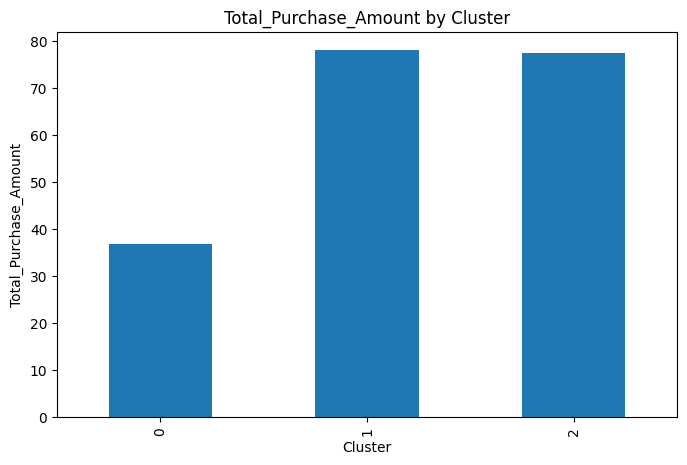

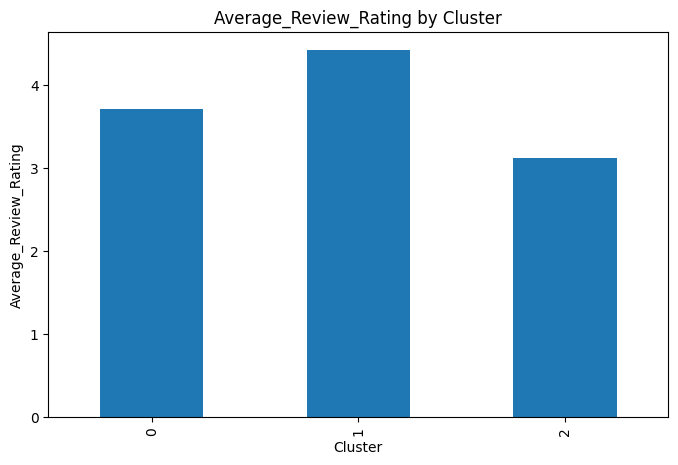

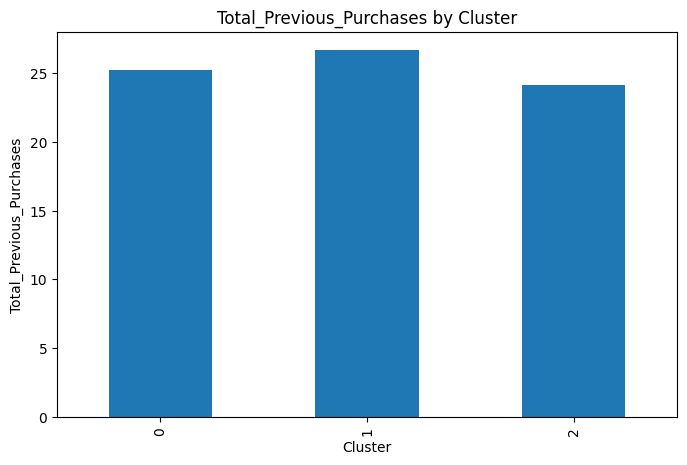

In [38]:
metrics = ['Total_Purchase_Amount', 'Average_Review_Rating', 'Total_Previous_Purchases']

for metric in metrics:
    cluster_summary[metric].plot(kind='bar', figsize=(8, 5), title=f'{metric} by Cluster')
    plt.xlabel('Cluster')
    plt.ylabel(metric)
    plt.show()

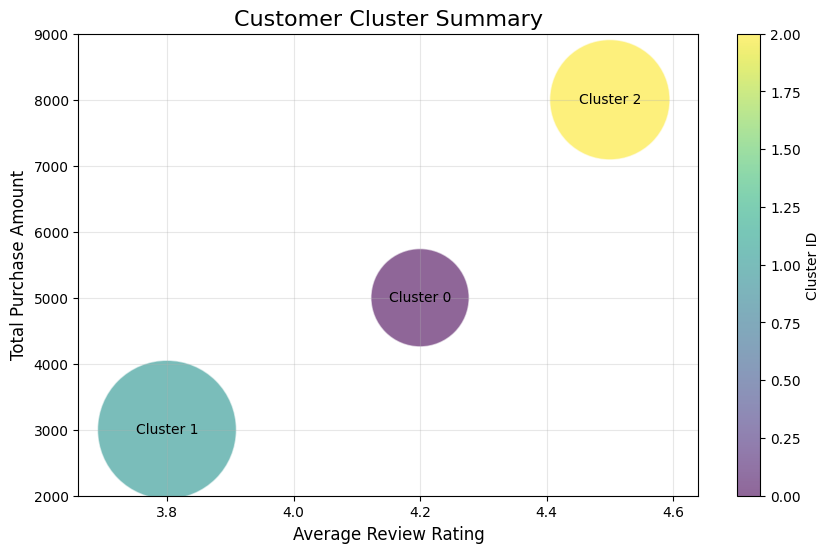

In [39]:
cluster_summary = pd.DataFrame({
    'Average_Review_Rating': [4.2, 3.8, 4.5],
    'Total_Purchase_Amount': [5000, 3000, 8000],
    'Cluster_Size': [100, 200, 150]
}, index=[0, 1, 2]) 

x = cluster_summary['Average_Review_Rating']  
y = cluster_summary['Total_Purchase_Amount']  
sizes = cluster_summary['Cluster_Size'] * 50  

x_pad = (x.max() - x.min()) * 0.2 
y_pad = (y.max() - y.min()) * 0.2  

plt.figure(figsize=(10, 6))
scatter = plt.scatter(x, y, s=sizes, alpha=0.6, c=cluster_summary.index, cmap='viridis', edgecolors='w')

# Add labels and title
plt.title("Customer Cluster Summary", fontsize=16)
plt.xlabel("Average Review Rating", fontsize=12)
plt.ylabel("Total Purchase Amount", fontsize=12)

# Set x and y axis limits with padding
plt.xlim(x.min() - x_pad, x.max() + x_pad)
plt.ylim(y.min() - y_pad, y.max() + y_pad)

# Add color bar and annotations
plt.colorbar(scatter, label='Cluster ID')
for i, (x_val, y_val) in enumerate(zip(x, y)):
    plt.text(x_val, y_val, f"Cluster {i}", fontsize=10, ha='center', va='center', color='black')

plt.grid(alpha=0.3)
plt.show()


#Exploratory-Data-Analysis

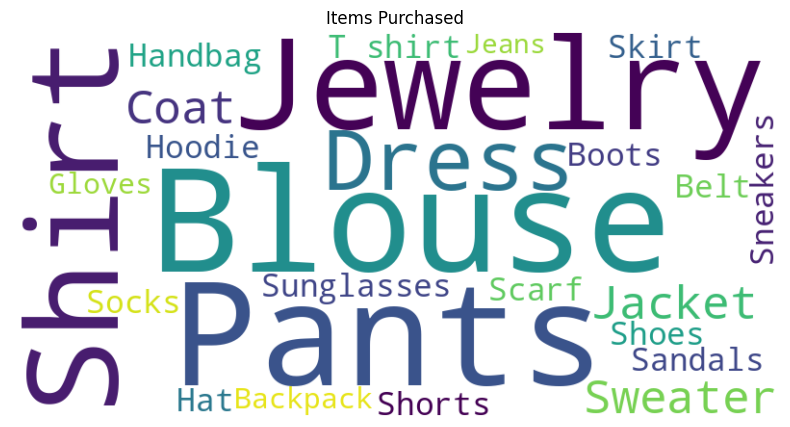

In [40]:
all_items = ' '.join(shopping_trends['Item Purchased'])

wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis', max_font_size=150, max_words=100).generate(all_items)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Items Purchased')
plt.axis('off')  
plt.show()

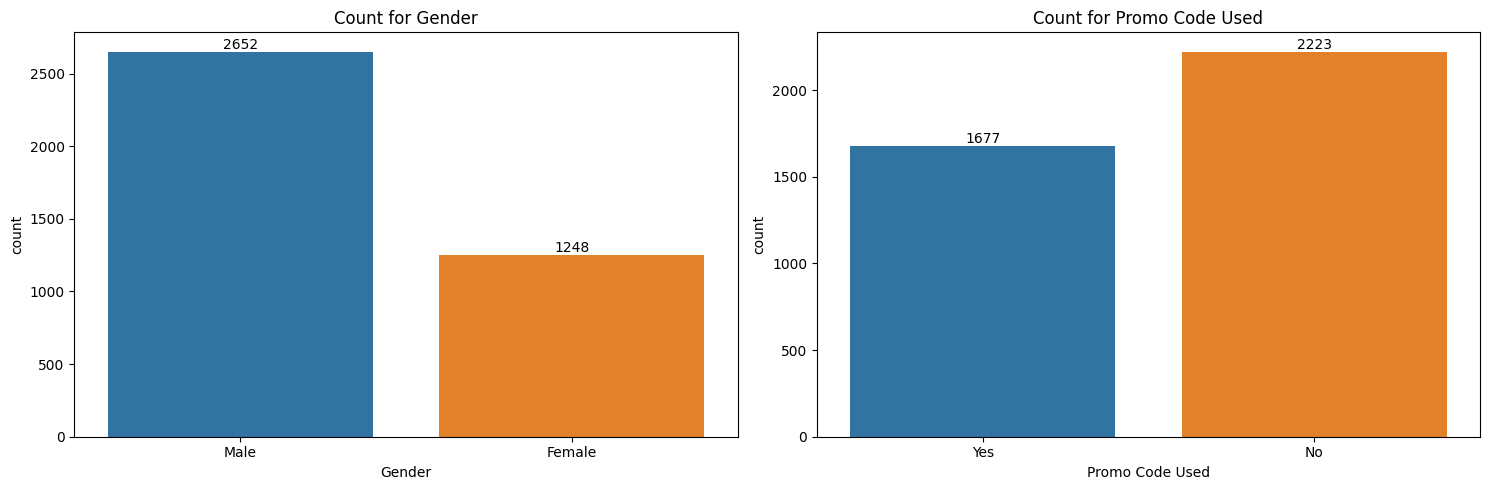

In [41]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

sns.countplot(x='Gender', data=shopping_trends, ax=axes[0])
axes[0].set_title('Count for Gender')
axes[0].set_xticklabels(['Male', 'Female'])

for patch in axes[0].patches:
    count = int(patch.get_height())
    axes[0].annotate(f'{count}', 
                     (patch.get_x() + patch.get_width() / 2., patch.get_height()), 
                     ha='center', va='bottom')

sns.countplot(x='Promo Code Used', data=shopping_trends, ax=axes[1])
axes[1].set_title('Count for Promo Code Used')
axes[1].set_xticklabels(['Yes', 'No'])

for patch in axes[1].patches:
    count = int(patch.get_height())
    axes[1].annotate(f'{count}', 
                     (patch.get_x() + patch.get_width() / 2., patch.get_height()), 
                     ha='center', va='bottom')

plt.tight_layout()
plt.show()


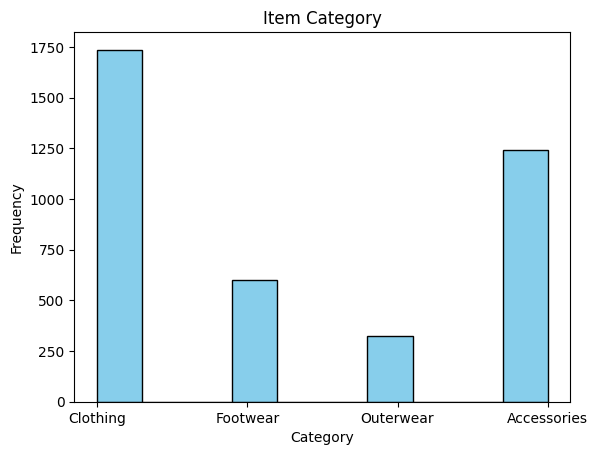

In [42]:
plt.hist(shopping_trends['Category'], bins=10, color='skyblue', edgecolor='black')

plt.title('Item Category')
plt.xlabel('Category')
plt.ylabel('Frequency')

plt.show()

In [43]:
unique_counts = shopping_trends['Location'].value_counts()
print(unique_counts)

Location
Montana           96
California        95
Idaho             93
Illinois          92
Alabama           89
Minnesota         88
Nebraska          87
New York          87
Nevada            87
Maryland          86
Delaware          86
Vermont           85
Louisiana         84
North Dakota      83
Missouri          81
West Virginia     81
New Mexico        81
Mississippi       80
Indiana           79
Georgia           79
Kentucky          79
Arkansas          79
North Carolina    78
Connecticut       78
Virginia          77
Ohio              77
Tennessee         77
Texas             77
Maine             77
South Carolina    76
Colorado          75
Oklahoma          75
Wisconsin         75
Oregon            74
Pennsylvania      74
Washington        73
Michigan          73
Alaska            72
Massachusetts     72
Wyoming           71
Utah              71
New Hampshire     71
South Dakota      70
Iowa              69
Florida           68
New Jersey        67
Hawaii            65
Ariz

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


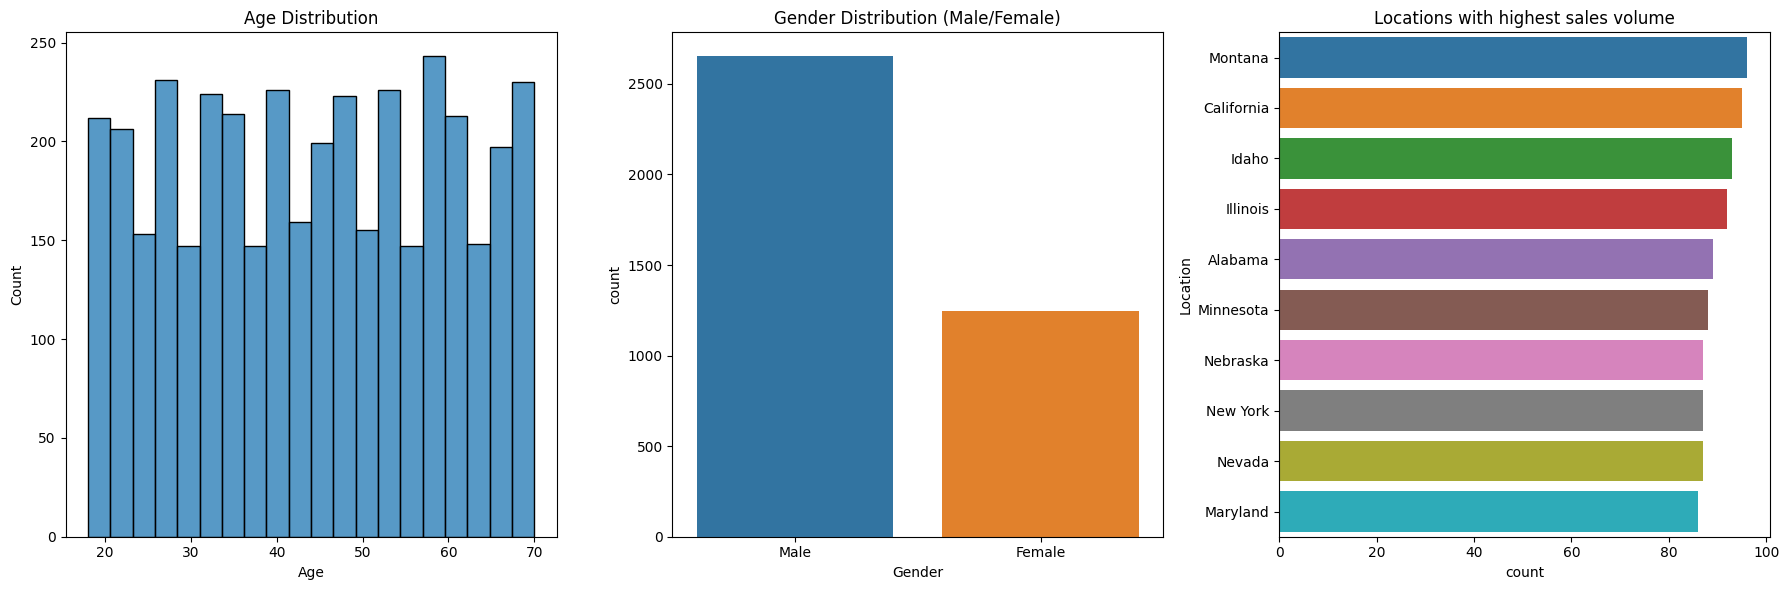

In [44]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

sns.histplot(data=shopping_trends, x='Age', bins=20, ax=axes[0])
axes[0].set_title('Age Distribution')

sns.countplot(data=shopping_trends, x='Gender', ax=axes[1])
axes[1].set_title('Gender Distribution (Male/Female)')
axes[1].set_xticklabels(['Male', 'Female']) 

sns.countplot(data=shopping_trends, y='Location', ax=axes[2], order=shopping_trends['Location'].value_counts().index[:10])
axes[2].set_title('Locations with highest sales volume')
axes[2].set_ylabel('Location')

plt.tight_layout()

plt.show()

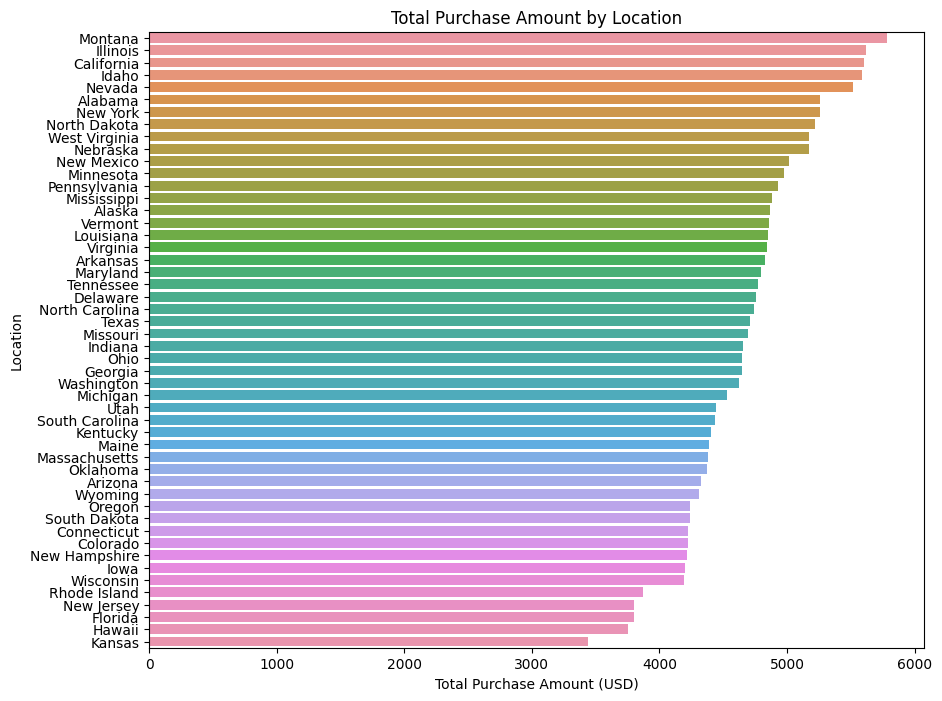

In [45]:
purchase_by_location = shopping_trends.groupby('Location')['Purchase Amount (USD)'].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(y=purchase_by_location.index, x=purchase_by_location.values, orient='h')
plt.title('Total Purchase Amount by Location')
plt.xlabel('Total Purchase Amount (USD)')
plt.ylabel('Location')
plt.show()

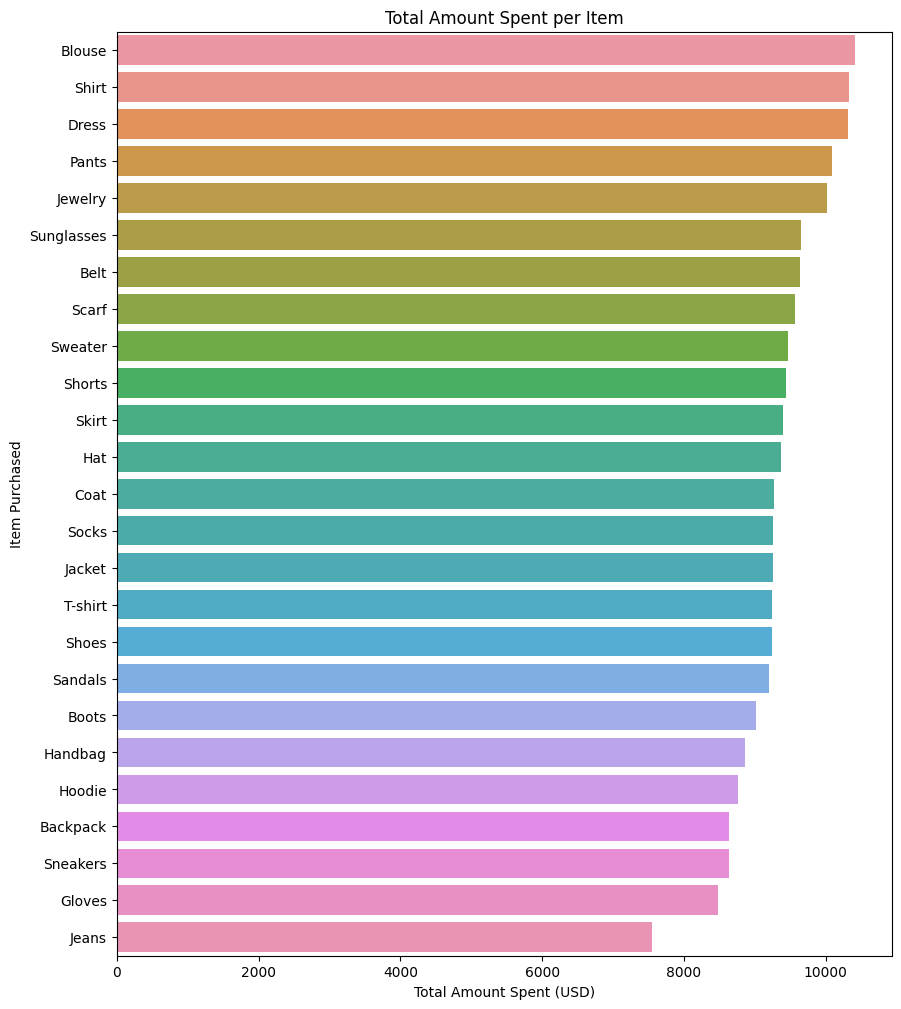

In [46]:
plt.figure(figsize=(10, 12))

item_totals = shopping_trends.groupby('Item Purchased')['Purchase Amount (USD)'].sum().sort_values(ascending=False)

sns.barplot(y=item_totals.index, x=item_totals.values)
plt.title('Total Amount Spent per Item')
plt.xlabel('Total Amount Spent (USD)')
plt.ylabel('Item Purchased')
plt.show()


In [47]:
variance_by_item = shopping_trends.groupby('Item Purchased')['Purchase Amount (USD)'].var()

item_with_max_variance = variance_by_item.idxmax()
max_variance = variance_by_item.max()

print("Item with the biggest variance in price:", item_with_max_variance)
print("Variance:", max_variance)

Item with the biggest variance in price: Jewelry
Variance: 624.4500171998625


<font color='white' size=4>**<span style='background:blue'> Jewelry had the greatest variance in price </span>**</font>

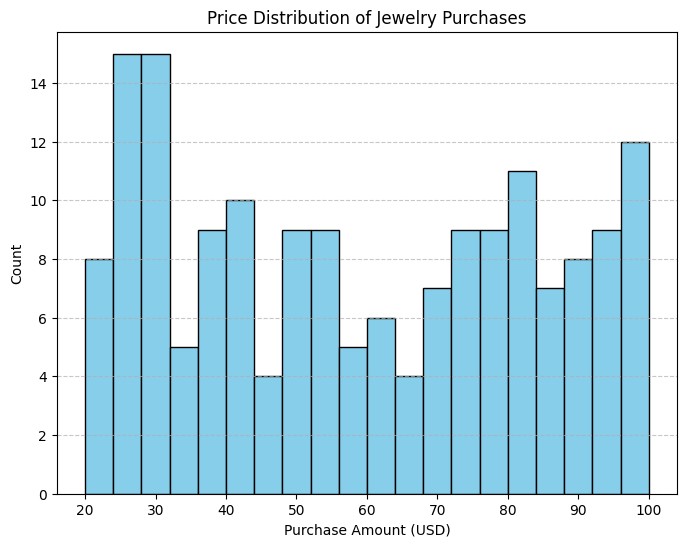

In [48]:
tshirts_data = shopping_trends[shopping_trends['Item Purchased'] == 'Jewelry']

plt.figure(figsize=(8, 6))
plt.hist(tshirts_data['Purchase Amount (USD)'], bins=20, color='skyblue', edgecolor='black')
plt.title('Price Distribution of Jewelry Purchases')
plt.xlabel('Purchase Amount (USD)')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.7)  
plt.show()

In [49]:
customer_summary = shopping_trends.groupby('Customer ID').agg(
    total_spent=('Purchase Amount (USD)', 'sum'),
    purchase_count=('Purchase Amount (USD)', 'count')
).reset_index()
customer_summary['average_purchase_value'] = customer_summary['total_spent'] / customer_summary['purchase_count']
mean_average_purchase_value = customer_summary['average_purchase_value'].mean()
# Stylish print with formatting
print("\n" + "=" * 50)
print(f"✨ The Average Purchase Value is: 💲{mean_average_purchase_value:,.2f} ✨")
print("=" * 50 + "\n")



✨ The Average Purchase Value is: 💲59.76 ✨



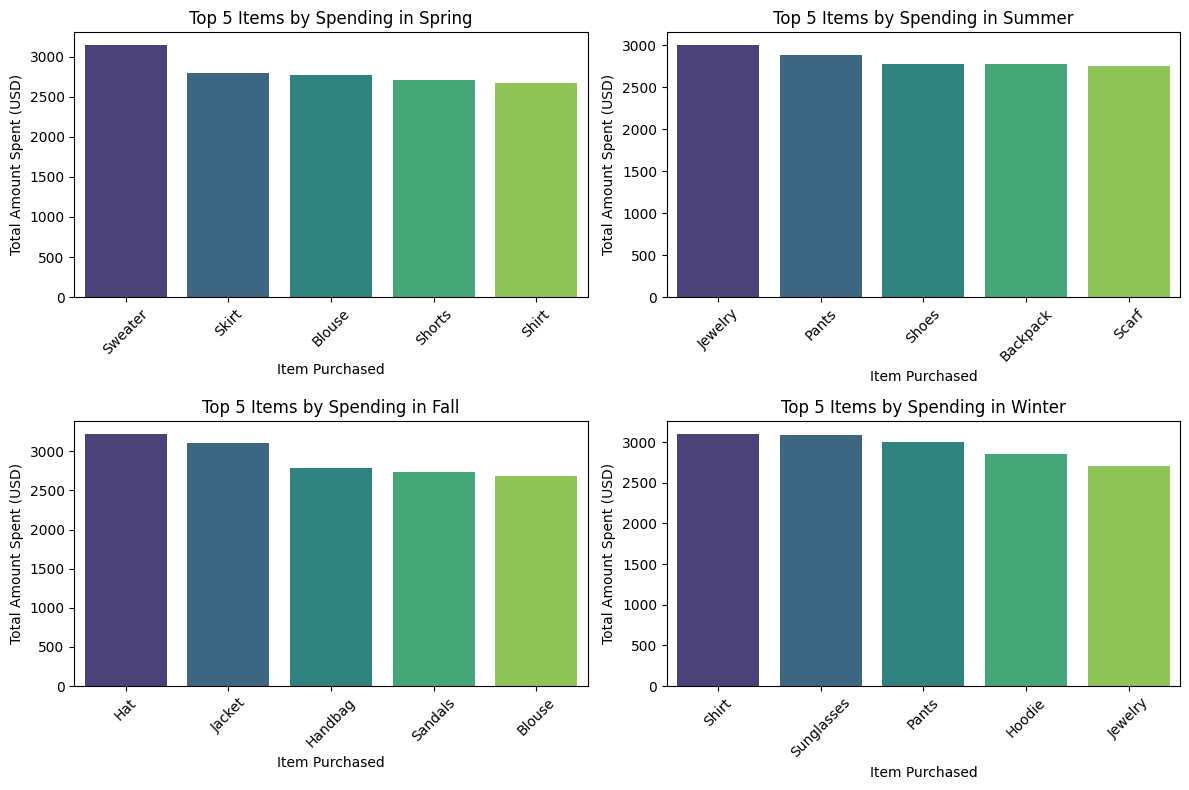

In [50]:
def get_top_items_by_spending(df, season_column, item_column, amount_column, n=5):
    top_items = {}
    season_order = ['Spring', 'Summer', 'Fall', 'Winter']
    for season in season_order:
        season_data = df[df[season_column] == season]
        top_items_spent = (
            season_data.groupby(item_column)[amount_column]
            .sum()
            .sort_values(ascending=False)
            .head(n)
            .index.tolist()
        )
        top_items[season] = top_items_spent
    return top_items

top_items_season = get_top_items_by_spending(shopping_trends, 'Season', 'Item Purchased', 'Purchase Amount (USD)', n=5)

fig, axes = plt.subplots(2, 2, figsize=(12, 8))

axes = axes.flatten()

for i, (season, items) in enumerate(top_items_season.items()):
    season_data = shopping_trends[shopping_trends['Season'] == season]
    top_items_data = (
        season_data[season_data['Item Purchased'].isin(items)]
        .groupby('Item Purchased')['Purchase Amount (USD)']
        .sum()
        .reindex(items)  
    )
    sns.barplot(x=top_items_data.index, y=top_items_data.values, ax=axes[i], palette='viridis')
    axes[i].set_title(f'Top 5 Items by Spending in {season}')
    axes[i].set_xlabel('Item Purchased')
    axes[i].set_ylabel('Total Amount Spent (USD)')
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()

plt.show()


<span style="color:blue; font-size:30px;">Seasonal Trends</span>
<div style="background-color:#f9f9f9; padding:10px; border-radius:5px;">
</div>

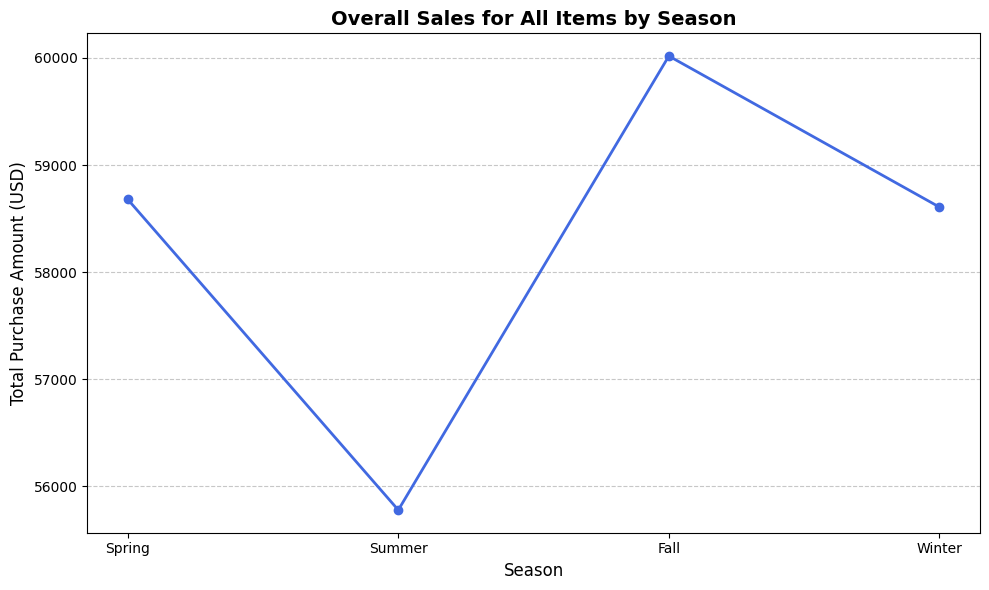

In [51]:
season_order = ['Spring', 'Summer', 'Fall', 'Winter']

# Group and reindex data
seasonal_totals = shopping_trends.groupby('Season')['Purchase Amount (USD)'].sum()
seasonal_totals = seasonal_totals.reindex(season_order)

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(season_order, seasonal_totals, marker='o', linestyle='-', linewidth=2, color='royalblue')

# Improve the appearance
plt.title('Overall Sales for All Items by Season', fontsize=14, fontweight='bold')
plt.xlabel('Season', fontsize=12)
plt.ylabel('Total Purchase Amount (USD)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()


In [52]:
season_order = ['Spring', 'Summer', 'Fall', 'Winter']

item_counts = shopping_trends.groupby(['Season', 'Item Purchased']).size().reset_index(name='Count')

item_counts_table = item_counts.pivot_table(
    index='Item Purchased',
    columns='Season',
    values='Count',
    aggfunc='sum'
).fillna(0)

item_counts_table = item_counts_table[season_order]

print("Count of Each Item by Season:")
display(item_counts_table)


Count of Each Item by Season:


Season,Spring,Summer,Fall,Winter
Item Purchased,,,,
Backpack,39,45,34,25
Belt,41,39,41,40
Blouse,46,43,42,40
Boots,40,38,35,31
Coat,46,42,34,39
Dress,43,47,36,40
Gloves,42,29,37,32
Handbag,36,35,48,34
Hat,27,37,50,40


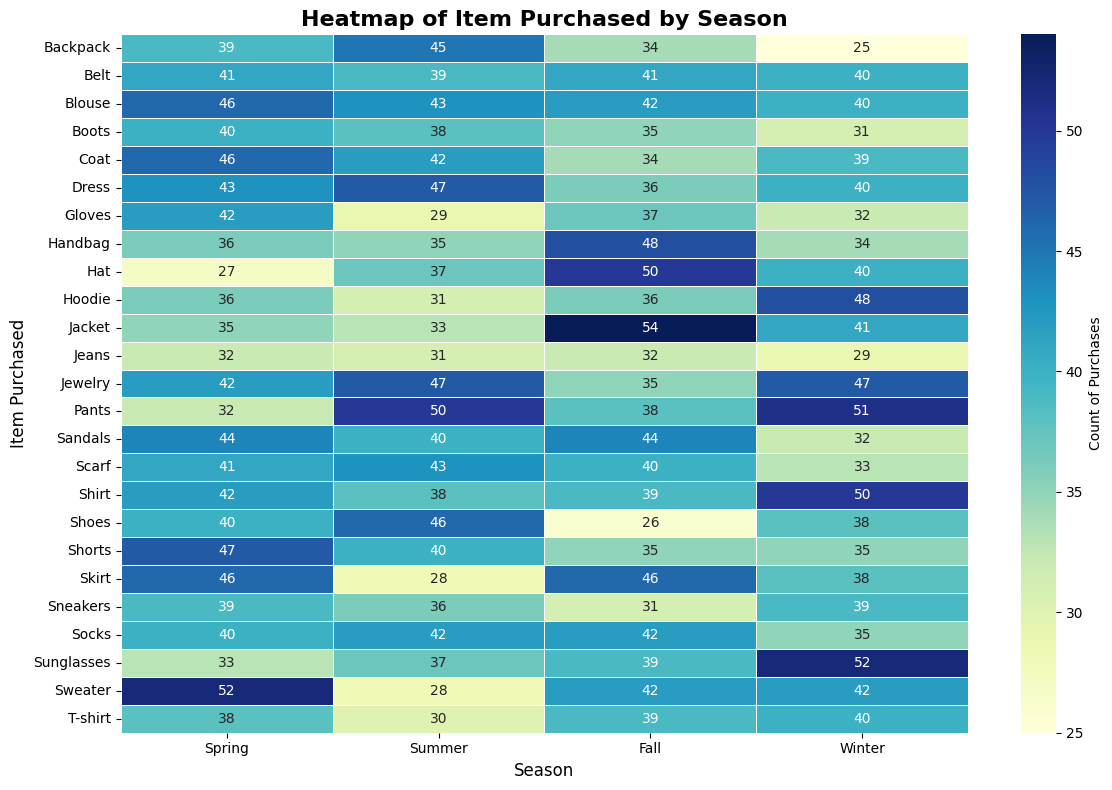

In [53]:
season_order = ['Spring', 'Summer', 'Fall', 'Winter']

item_counts = shopping_trends.groupby(['Season', 'Item Purchased']).size().reset_index(name='Count')

item_counts_table = item_counts.pivot_table(
    index='Item Purchased',
    columns='Season',
    values='Count',
    aggfunc='sum'
).fillna(0)

item_counts_table = item_counts_table[season_order]

plt.figure(figsize=(12, 8))
sns.heatmap(item_counts_table, annot=True, fmt=".0f", cmap="YlGnBu", linewidths=0.5, cbar_kws={'label': 'Count of Purchases'})

plt.title('Heatmap of Item Purchased by Season', fontsize=16, fontweight='bold')
plt.xlabel('Season', fontsize=12)
plt.ylabel('Item Purchased', fontsize=12)

plt.tight_layout()

plt.show()


Clothing purchases are influenced strongly by seasonal changes:
Cold weather: Sweaters, Pants, Hoodies, and Gloves.
Warm weather: Hats, Sandals, Shorts, and Sunglasses.
Items like Jewelry and Pants had strong sales year-round

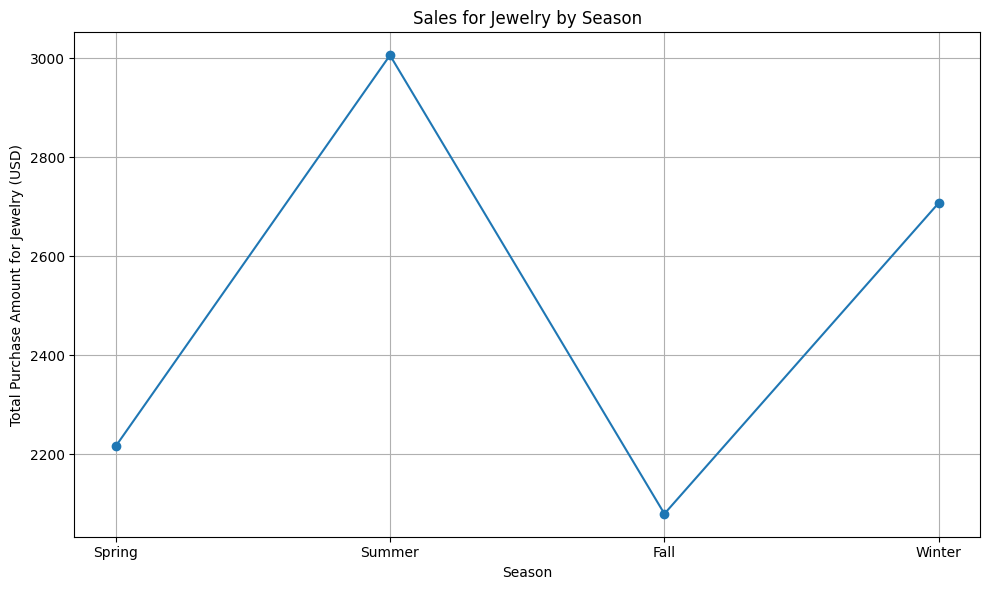

In [54]:
season_order = ['Spring', 'Summer', 'Fall', 'Winter']

sunglasses_data = shopping_trends[shopping_trends['Item Purchased'] == 'Jewelry']

seasonal_sunglasses_totals = sunglasses_data.groupby('Season')['Purchase Amount (USD)'].sum()

plt.figure(figsize=(10, 6))
plt.plot(season_order, seasonal_sunglasses_totals.reindex(season_order), marker='o', linestyle='-')
plt.title('Sales for Jewelry by Season')
plt.xlabel('Season')
plt.ylabel('Total Purchase Amount for Jewelry (USD)')
plt.grid(True)
plt.tight_layout()
plt.show()

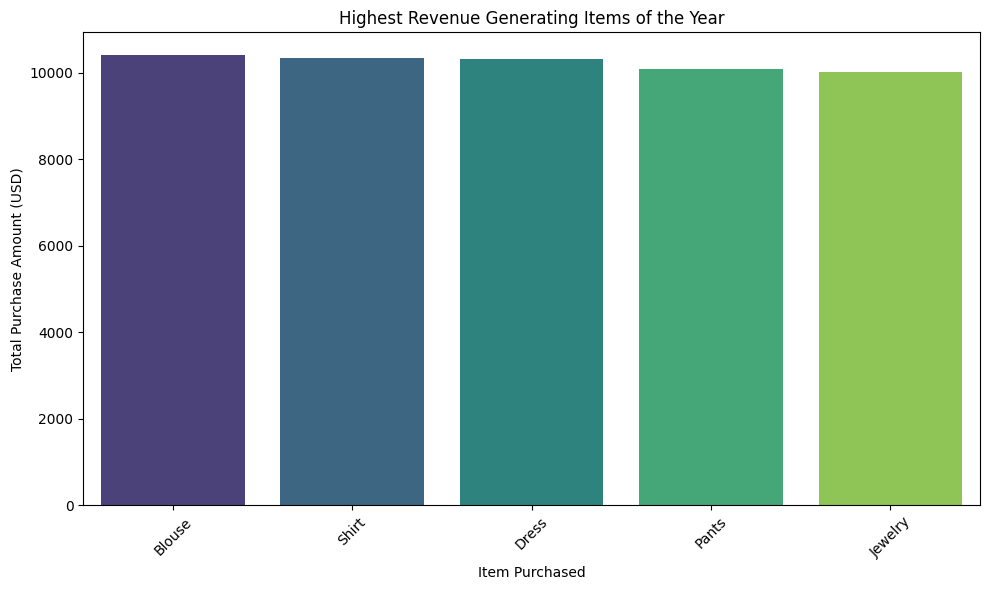

In [55]:
item_sales = shopping_trends.groupby('Item Purchased')['Purchase Amount (USD)'].sum().reset_index()

top_3_items = item_sales.sort_values(by='Purchase Amount (USD)', ascending=False).head(5)

plt.figure(figsize=(10, 6))
sns.barplot(data=top_3_items, x='Item Purchased', y='Purchase Amount (USD)', palette='viridis')
plt.title('Highest Revenue Generating Items of the Year')
plt.xlabel('Item Purchased')
plt.ylabel('Total Purchase Amount (USD)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

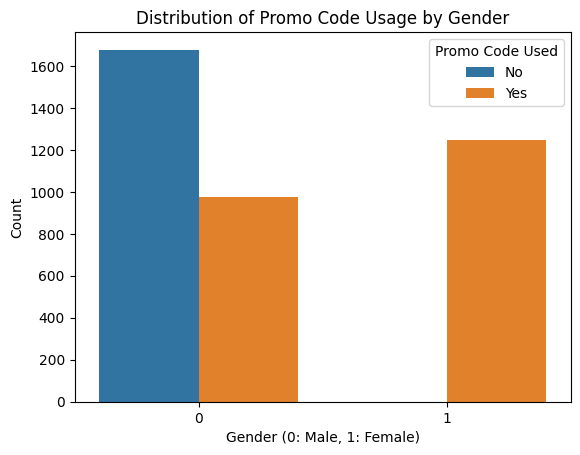

In [56]:
sns.countplot(x='Gender', hue='Promo Code Used', data=shopping_trends)
plt.title('Distribution of Promo Code Usage by Gender')
plt.xlabel('Gender (0: Male, 1: Female)')
plt.ylabel('Count')
plt.legend(title='Promo Code Used', labels=['No', 'Yes'])
plt.show()

<font color='white' size=4>**<span style='background:blue'> Women did not use the promo codes, indicating the promo codes may only have been sent to male customers </span>**</font>

In [57]:
filtered_df = shopping_trends[(shopping_trends['Gender'] == 0) & (shopping_trends['Promo Code Used'] == 1)]

count_instances = len(filtered_df)

print("Count of instances where 'Gender' is 0 (male) and 'Promo Code Used' is '1':", count_instances)

Count of instances where 'Gender' is 0 (male) and 'Promo Code Used' is '1': 975


In [58]:
male_promo_codes_not_used = shopping_trends[(shopping_trends['Gender'] == 0) & (shopping_trends['Promo Code Used'] == 1)]

count_male_promo_codes_not_used = len(male_promo_codes_not_used)

print("Count of not using promo codes by males:", count_male_promo_codes_not_used)

Count of not using promo codes by males: 975


In [59]:
male_promo_codes_used = shopping_trends[(shopping_trends['Gender'] == 0) & (shopping_trends['Promo Code Used'] == 0)]

count_male_promo_codes_used = len(male_promo_codes_used)

print("Count of promo codes used by males:", count_male_promo_codes_used)

Count of promo codes used by males: 1677


In [60]:
female_promo_codes_not_used = shopping_trends[(shopping_trends['Gender'] == 1) & (shopping_trends['Promo Code Used'] == 1)]

count_female_promo_codes_not_used = len(female_promo_codes_not_used)

print("Count of not using promo codes by females:", count_male_promo_codes_not_used)

Count of not using promo codes by females: 975


In [61]:
male_promo_codes_used = shopping_trends[(shopping_trends['Gender'] == 1) & (shopping_trends['Promo Code Used'] == 0)]

count_male_promo_codes_used = len(male_promo_codes_used)

print("Count of promo codes used by women:", count_male_promo_codes_used)

Count of promo codes used by women: 0


<span style="color:blue; font-size:30px;">It is noteworthy that women did not use promo codes. This trend indicateds promo codes should instead be sent to all customers, not just males</span>
<div style="background-color:#f9f9f9; padding:10px; border-radius:5px;">
</div>

In [62]:
shipping_type_counts = shopping_trends['Shipping Type'].value_counts()

print("Count of shipping types:")
print(shipping_type_counts)

Count of shipping types:
Shipping Type
Free Shipping     675
Standard          654
Store Pickup      650
Next Day Air      648
Express           646
2-Day Shipping    627
Name: count, dtype: int64


The data indicates women did not use promo codes. With women comprising close to a third of the customers, something should be done to address this trend. Customers could also be sent emails based on which cluster group they were placed into, such as a loyalty reward for higher spending customers who gave better ratings.  